## 데이터 불러오기

In [ ]:
# 세션 다시 시작해야하므로 먼저 실행하고 주석 처리 할 것
# !pip install autogluon.tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [1]:
# kaggle 업그레이드
!pip install kaggle --upgrade

In [2]:
# kaggle 폴더 만들기
!mkdir -p ~/.kaggle

In [3]:
# 본인의 kaggle api 사용
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                        title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kanchana1990/vehicle-dataset-2024                          Vehicle Dataset 2024                                308KB  2024-05-29 20:02:30            882         33  1.0              
jainaru/parkinson-disease-detection                        Parkinson Disease Detection                          16KB  2024-05-27 15:51:16            719         23  1.0              
piterfm/football-soccer-uefa-euro-1960-2024                Football - Soccer - UEFA EURO, 1960 - 2024           87KB  2024-05-27 19:28:57            772         23  1.0              
hamjashaikh/mental-health-detection-dataset                Mental Health Detection Da

In [7]:
!kaggle competitions download -c playground-series-s4e5

 89% 25.0M/28.0M [00:00<00:00, 85.8MB/s]
100% 28.0M/28.0M [00:00<00:00, 94.3MB/s]


In [8]:
!unzip -q /content/playground-series-s4e5.zip

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## train 확인하기

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

| 칼럼                     | 의미         |
|----------------------------------|-----------------------------|
| 'id'                             | 임의 ID                      |
| 'MonsoonIntensity'               | 장마 강도                   |
| 'TopographyDrainage'             | 지형 배수                   |
| 'RiverManagement'                | 강 관리                     |
| 'Deforestation'                  | 산림 파괴                   |
| 'Urbanization'                   | 도시화                      |
| 'ClimateChange'                  | 기후 변화                   |
| 'DamsQuality'                    | 댐 품질                     |
| 'Siltation'                      | 퇴적물 쌓임                |
| 'AgriculturalPractices'          | 농업 관행                   |
| 'Encroachments'                  | 침범                        |
| 'IneffectiveDisasterPreparedness'| 비효과적인 재난 대비        |
| 'DrainageSystems'                | 배수 시스템                 |
| 'CoastalVulnerability'           | 연안 취약성                 |
| 'Landslides'                     | 산사태                      |
| 'Watersheds'                     | 유역                        |
| 'DeterioratingInfrastructure'    | 악화된 인프라               |
| 'PopulationScore'                | 인구 점수                   |
| 'WetlandLoss'                    | 습지 상실                   |
| 'InadequatePlanning'             | 불충분한 계획               |
| 'PoliticalFactors'               | 정치적 요인                 |
| 'FloodProbability'               | 홍수 가능성                 |


In [ ]:
# id 칼럼을 제외한 나머지 칼럼 개수 : 21
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
train.columns.shape[0]

22

In [ ]:
train.head(10)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
5,5,5,4,1,4,2,4,6,6,7,...,3,5,5,4,4,6,8,3,2,0.440
6,6,8,3,1,2,3,7,3,4,6,...,2,5,6,4,5,6,3,4,6,0.460
7,7,6,6,5,7,5,5,3,5,5,...,5,3,5,5,8,6,8,5,6,0.595
8,8,5,2,8,5,4,5,2,4,5,...,9,2,7,3,4,6,4,5,5,0.505
9,9,4,2,3,5,8,6,5,5,7,...,6,3,3,4,4,3,3,5,6,0.455


## 각 칼럼별 변수 개수

In [ ]:
# 0~16까지
train['MonsoonIntensity'].value_counts().sort_index(ascending=True)

MonsoonIntensity
0       5431
1      28946
2      86683
3     160574
4     214344
5     220936
6     169080
7     109210
8      65954
9      33515
10     14040
11      5851
12      2062
13       729
14       391
15       169
16        42
Name: count, dtype: int64

In [ ]:
# 0~18 까지
train['TopographyDrainage'].value_counts().sort_index(ascending=True)

TopographyDrainage
0       5541
1      29422
2      90058
3     161989
4     213368
5     221252
6     159003
7     102681
8      72000
9      37544
10     15524
11      6177
12      2199
13       705
14       333
15       106
16        42
17        10
18         3
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['RiverManagement'].value_counts().sort_index(ascending=True)

RiverManagement
0       5407
1      28872
2      83782
3     160049
4     214079
5     218216
6     167368
7     108538
8      71204
9      36232
10     15170
11      5773
12      2120
13       715
14       297
15        92
16        43
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['Deforestation'].value_counts().sort_index(ascending=True)

Deforestation
0       5327
1      26881
2      85948
3     157331
4     219733
5     217793
6     169175
7     109039
8      69237
9      34585
10     13968
11      5706
12      2079
13       706
14       293
15       115
16        35
17         6
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['Urbanization'].value_counts().sort_index(ascending=True)

Urbanization
0       5350
1      29672
2      86122
3     162234
4     212438
5     216722
6     166703
7     107693
8      69295
9      36854
10     15690
11      5689
12      2211
13       791
14       313
15       137
16        36
17         7
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['ClimateChange'].value_counts().sort_index(ascending=True)

ClimateChange
0       5347
1      27326
2      88158
3     159728
4     214268
5     218995
6     169316
7     107802
8      69171
9      34687
10     14457
11      5516
12      2063
13       729
14       260
15        96
16        35
17         3
Name: count, dtype: int64

In [ ]:
# 0~16까지
train['DamsQuality'].value_counts().sort_index(ascending=True)

DamsQuality
0       5878
1      28605
2      84763
3     158316
4     216308
5     218237
6     164786
7     108185
8      71757
9      35903
10     15121
11      6504
12      2371
13       738
14       334
15       124
16        27
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['Siltation'].value_counts().sort_index(ascending=True)

Siltation
0       5381
1      28487
2      87322
3     160419
4     215232
5     222270
6     164780
7     106481
8      68231
9      35460
10     14815
11      5700
12      2108
13       781
14       320
15       142
16        28
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['AgriculturalPractices'].value_counts().sort_index(ascending=True)

AgriculturalPractices
0       5680
1      28587
2      85659
3     160403
4     214366
5     216644
6     168426
7     109213
8      69347
9      36004
10     14622
11      5900
12      2085
13       631
14       254
15        96
16        40
Name: count, dtype: int64

In [ ]:
# 0~18 까지
train['Encroachments'].value_counts().sort_index(ascending=True)

Encroachments
0       5531
1      27979
2      84628
3     160683
4     219708
5     219971
6     158864
7     106434
8      71237
9      37312
10     15952
11      6262
12      2145
13       750
14       343
15       110
16        33
17        13
18         2
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['IneffectiveDisasterPreparedness'].value_counts().sort_index(ascending=True)

IneffectiveDisasterPreparedness
0       5410
1      27756
2      85851
3     162862
4     217365
5     215502
6     162108
7     107059
8      73046
9      36869
10     15184
11      5725
12      2055
13       673
14       336
15       124
16        32
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['DrainageSystems'].value_counts().sort_index(ascending=True)

DrainageSystems
0       5582
1      28923
2      84440
3     159355
4     216278
5     217753
6     167358
7     108156
8      71360
9      34274
10     14737
11      6240
12      2203
13       786
14       325
15       133
16        44
17        10
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['CoastalVulnerability'].value_counts().sort_index(ascending=True)

CoastalVulnerability
0       5747
1      29108
2      84481
3     162674
4     213263
5     215378
6     164640
7     108310
8      73577
9      35817
10     14753
11      6602
12      2370
13       761
14       332
15        99
16        38
17         7
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['Landslides'].value_counts().sort_index(ascending=True)

Landslides
0       5516
1      29051
2      88129
3     163932
4     212833
5     213811
6     164085
7     109608
8      72274
9      35411
10     14442
11      5618
12      2114
13       699
14       297
15       106
16        31
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['Watersheds'].value_counts().sort_index(ascending=True)

Watersheds
0       5404
1      28867
2      88319
3     163564
4     213627
5     219756
6     159072
7     107309
8      71822
9      36087
10     14885
11      5734
12      2227
13       811
14       329
15        94
16        50
Name: count, dtype: int64

In [ ]:
# 0~17 까지
train['DeterioratingInfrastructure'].value_counts().sort_index(ascending=True)

DeterioratingInfrastructure
0       4953
1      29511
2      85513
3     162850
4     218713
5     213578
6     168782
7     107019
8      67551
9      35832
10     14684
11      5788
12      2110
13       639
14       285
15       111
16        34
17         4
Name: count, dtype: int64

In [ ]:
# 0~18 까지
train['PopulationScore'].value_counts().sort_index(ascending=True)

PopulationScore
0       5536
1      28093
2      87742
3     161487
4     221136
5     213102
6     163538
7     106364
8      72443
9      34422
10     14804
11      5852
12      2200
13       779
14       338
15        73
16        38
17         9
18         1
Name: count, dtype: int64

In [ ]:
# 0~19 까지
train['WetlandLoss'].value_counts().sort_index(ascending=True)

WetlandLoss
0       5192
1      27958
2      84515
3     161270
4     217045
5     214587
6     167265
7     109524
8      71347
9      34947
10     15041
11      5993
12      2141
13       689
14       299
15       102
16        37
17         3
18         1
19         1
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['InadequatePlanning'].value_counts().sort_index(ascending=True)

InadequatePlanning
0       5619
1      27889
2      85421
3     165051
4     214851
5     217756
6     162099
7     106401
8      71588
9      36289
10     15694
11      5919
12      2135
13       717
14       358
15       132
16        38
Name: count, dtype: int64

In [ ]:
# 0~16 까지
train['PoliticalFactors'].value_counts().sort_index(ascending=True)

PoliticalFactors
0       5995
1      28786
2      86873
3     164017
4     215557
5     211264
6     163682
7     108315
8      72800
9      35675
10     15286
11      6332
12      2278
13       691
14       273
15        90
16        43
Name: count, dtype: int64

## 각 변수들에 따른 FloodProbability

In [ ]:
# group을 지어서 각 값마다 FloodProbability 확률 구하기
group = {}

for i in range(0, 20):
    group_mean = train.groupby(train.columns[i])['FloodProbability'].mean()
    column_name = train.columns[i] + "_group"
    group[column_name] = group_mean
# 이 밑에는 삭제 가능(확인용)
for key, value in group.items():
    print("새로운 데이터프레임:", key)
    print(value)

새로운 데이터프레임: id_group
id
0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64
새로운 데이터프레임: MonsoonIntensity_group
MonsoonIntensity
0     0.478244
1     0.484460
2     0.489469
3     0.495122
4     0.500402
5     0.505637
6     0.510212
7     0.515177
8     0.517737
9     0.522664
10    0.525461
11    0.526936
12    0.533031
13    0.538676
14    0.527404
15    0.523166
16    0.542381
Name: FloodProbability, dtype: float64
새로운 데이터프레임: TopographyDrainage_group
TopographyDrainage
0     0.477622
1     0.483090
2     0.488279
3     0.495416
4     0.500890
5     0.506359
6     0.510623
7     0.515882
8     0.515528
9     0.520027
10    0.523754
11    0.526574
12    0.530223
13    0.537730
14    0.532973
15    0.524292
16    0.547262
17    0.558000
18    0.510000
Name: FloodProbability, dtype: float64
새로운 데이터

In [ ]:
# Flood Probability 가 최대인 행 찾기
train[train['FloodProbability']==train['FloodProbability'].max()]

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
41513,41513,11,7,5,7,7,6,7,9,5,...,6,5,11,5,7,7,7,7,8,0.725
54869,54869,9,8,7,9,7,5,7,4,7,...,7,6,7,7,5,9,8,8,5,0.725
126497,126497,12,8,11,7,6,8,9,7,5,...,7,7,6,7,7,6,5,4,7,0.725
167242,167242,4,6,6,6,2,4,3,7,11,...,12,5,9,5,9,13,3,7,11,0.725
174746,174746,2,11,7,12,10,6,4,0,11,...,8,5,5,8,12,7,3,7,8,0.725
212238,212238,7,7,7,6,8,6,7,4,8,...,8,5,6,6,5,5,5,11,8,0.725
225830,225830,5,6,6,8,7,5,7,6,11,...,5,10,10,4,5,6,14,5,7,0.725
355719,355719,11,6,6,7,7,6,3,3,8,...,5,6,5,14,7,6,5,4,3,0.725
365266,365266,3,10,7,4,11,7,6,7,6,...,7,5,6,5,13,12,7,5,6,0.725
374545,374545,11,7,5,5,5,6,7,6,3,...,8,4,8,10,3,7,7,6,10,0.725


In [ ]:
# Flood Probability 가 최대인 행 찾기
train[train['FloodProbability']==train['FloodProbability'].min()]

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
59103,59103,6,3,2,6,7,5,4,6,4,...,7,3,5,2,7,6,2,3,5,0.285
84801,84801,5,8,4,5,5,6,4,6,3,...,3,5,4,2,4,3,4,4,5,0.285
164256,164256,2,6,5,5,5,4,5,6,1,...,5,3,3,3,4,2,2,2,5,0.285
242964,242964,4,7,5,7,4,5,8,2,6,...,3,6,4,1,4,3,3,3,9,0.285
331323,331323,6,2,2,5,7,4,5,3,6,...,4,4,6,8,6,5,3,3,5,0.285
346019,346019,3,2,6,4,4,3,4,3,4,...,2,2,3,6,4,2,5,4,4,0.285
405506,405506,3,4,8,3,3,5,4,4,2,...,8,4,6,1,2,3,3,3,0,0.285
418131,418131,6,2,6,4,3,1,3,3,2,...,2,5,3,5,2,5,5,4,3,0.285
427820,427820,7,4,6,2,4,5,4,3,4,...,8,3,3,6,3,5,4,5,4,0.285
514690,514690,4,6,13,3,3,3,4,2,2,...,10,2,7,6,6,4,5,3,5,0.285


In [ ]:
# 필요없는 id 칼럼 삭제
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

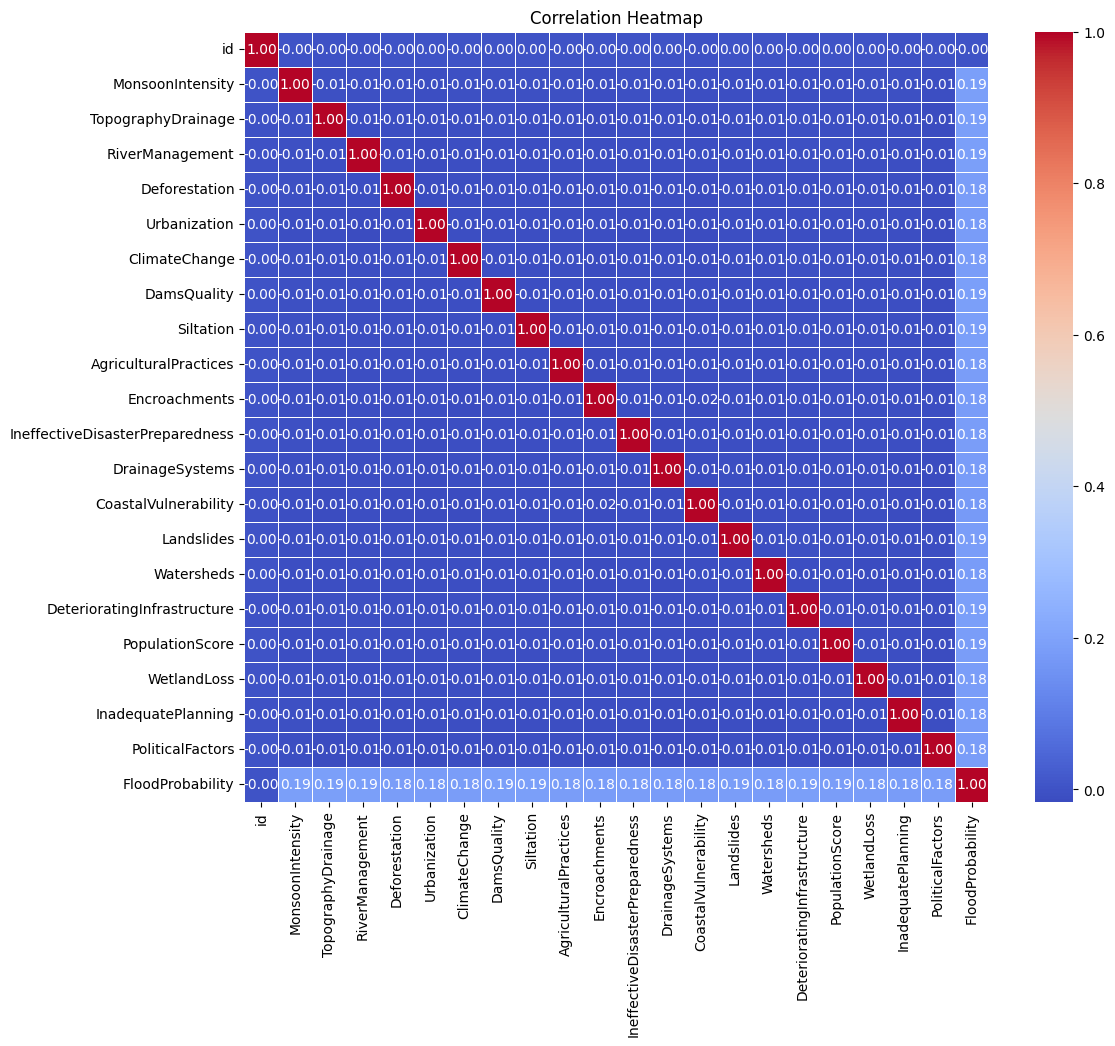

In [ ]:
# FloodProbability에 어떤 변수가 가장 큰 영향을 미치는지 확인
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# 상관관계 행렬 계산

correlation_matrix = train.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# 최대가 0.19 이므로 특별하게 영향을 미치는 요인은 없는 것으로 판단

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


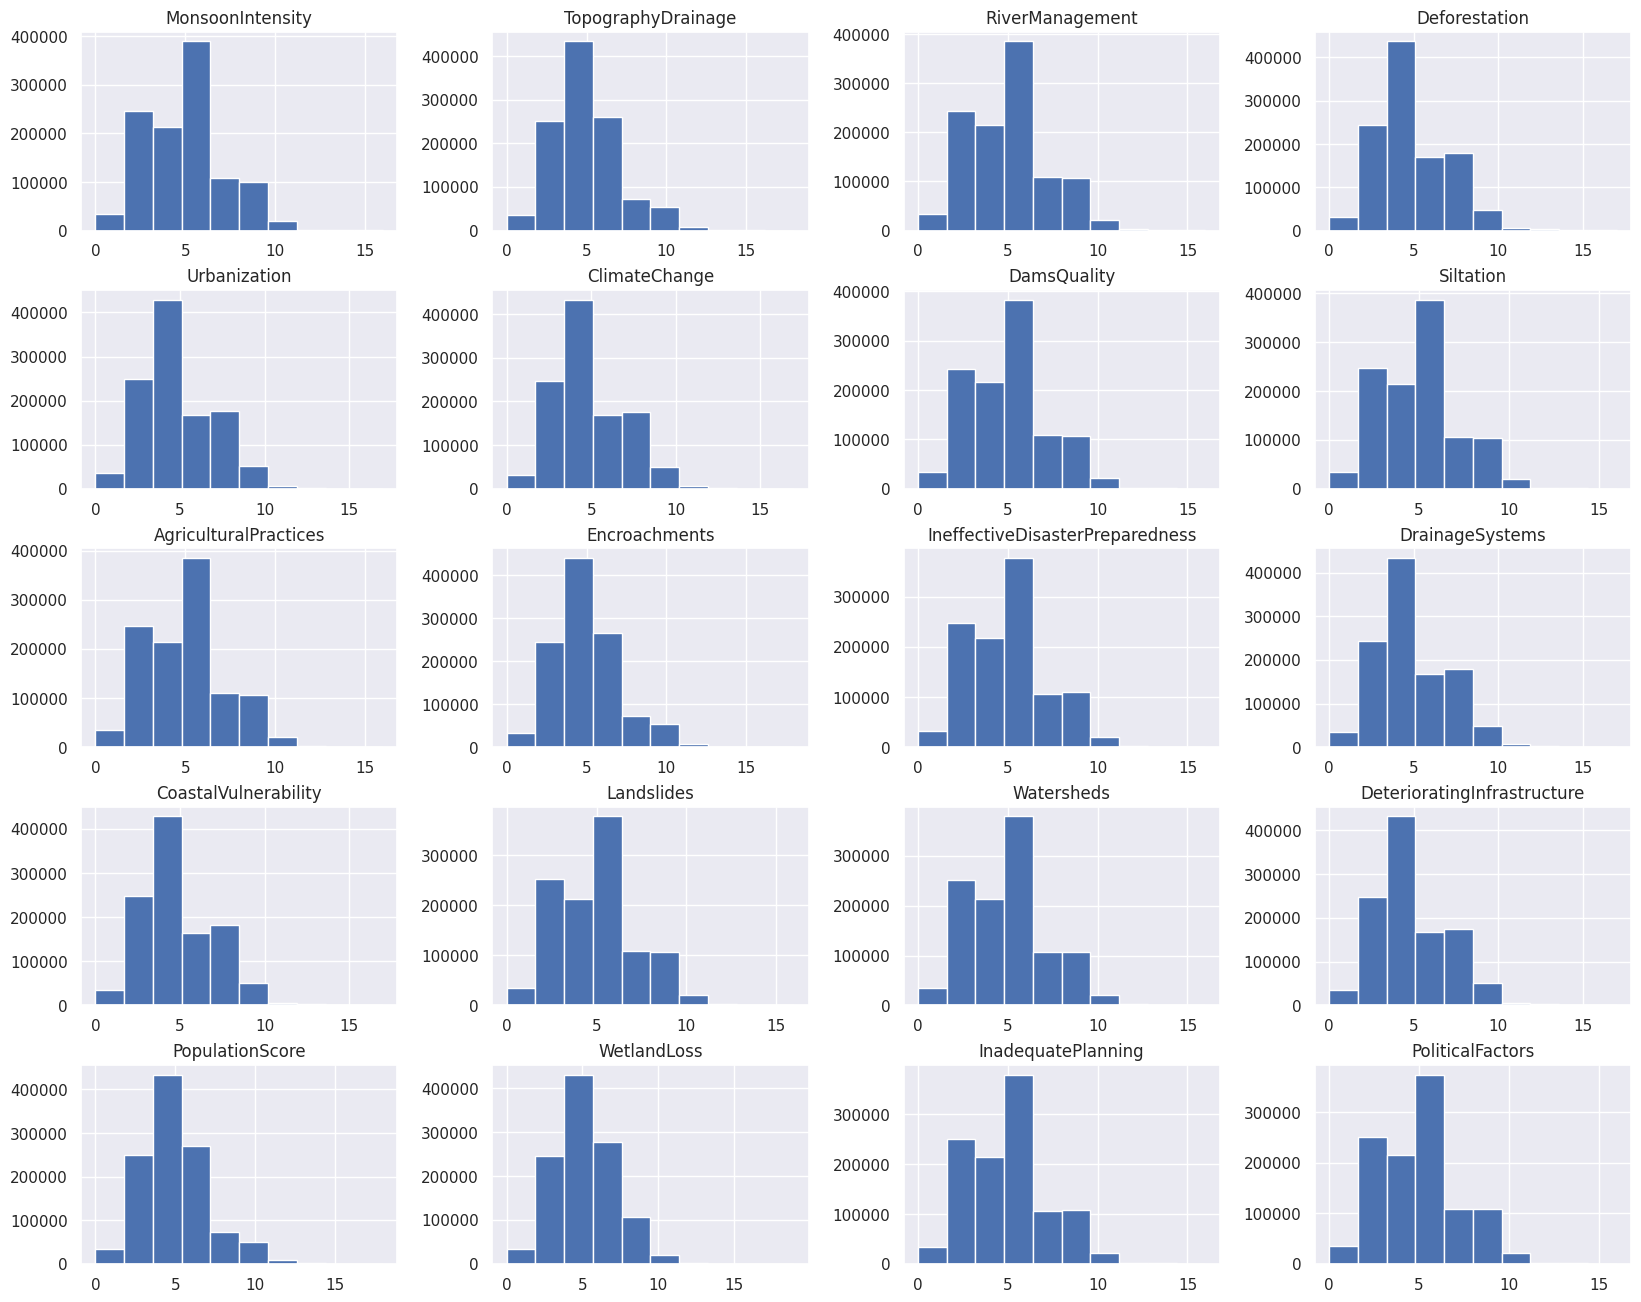

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 16)})
# FloodProb 제거
train_graph = train.iloc[:, :-1]
train_graph.hist();

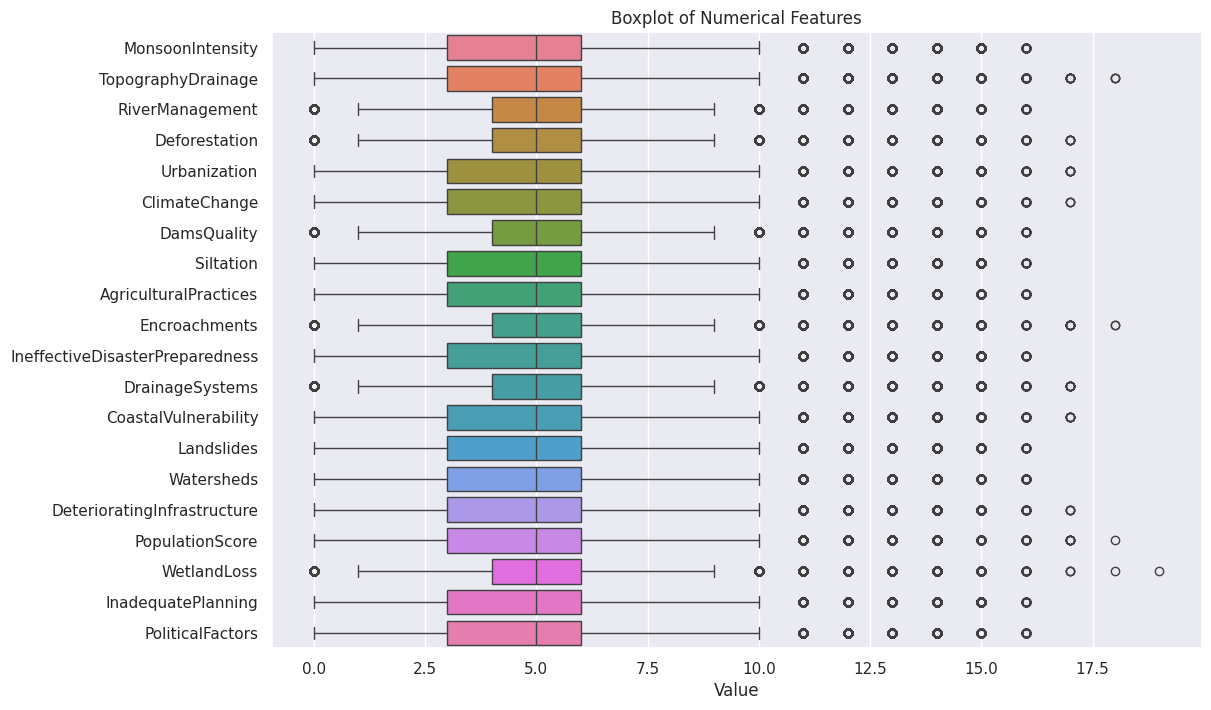

In [ ]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).drop(['FloodProbability'], axis=1).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=train[numeric_features], orient="h")
plt.title('Boxplot of Numerical Features')
plt.xlabel('Value')
plt.show()

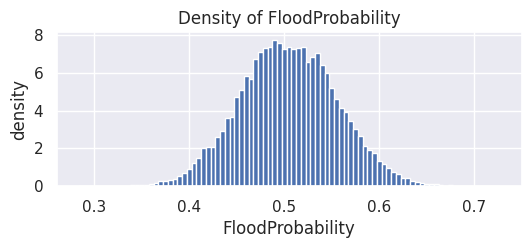

In [ ]:
import numpy as np
plt.figure(figsize=(6, 2))
plt.hist(train['FloodProbability'], bins=np.linspace(0.2825, 0.7275, 90), density=True)
plt.ylabel('density')
plt.xlabel('FloodProbability')
plt.title('Density of FloodProbability')
plt.show()

### 정규분포 가정

In [ ]:
from scipy.stats import shapiro
statistic, p_value = shapiro(train['FloodProbability'])
print("p-value:", p_value)
if p_value > 0.05:
    print("FloodProbability는 정규분포를 따른다")
else:
    print("FloodProbability는 정규분포를 따르지 않는다")

p-value: 1.0
FloodProbability는 정규분포를 따른다


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 모델링

1. 고차원의 데이터라서 PCA 및 StandardScaler 적용 후 모델링 사용
2. feature selection 적용(변수선택법)
3. 머신러닝 예측 기법 사용
4. 딥러닝 기법

## 회귀분석

**아무것도 안 한 Version(R^2 Score: 0.84495)**

In [ ]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, train['FloodProbability'])

r_squared = model.score(X_train, train['FloodProbability'])
print('R-squared:', r_squared)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


R-squared: 0.8449501050792337
Coefficients: [0.00561159 0.00564756 0.00566643 0.00567915 0.00565772 0.00566253
 0.00565494 0.00563783 0.00563522 0.00564989 0.0056404  0.00563556
 0.00567088 0.00564163 0.0056465  0.00561563 0.0056775  0.00563494
 0.00560868 0.0056494 ]
Intercept: -0.05329907893699193


### StandardScaler

In [ ]:
# Train의 마지막 열인 FloodProbability 제외
X_train = train.loc[:,train.columns != 'FloodProbability']
X_train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,3,7,8,7,2,2,1,4,6,4
1117953,2,2,4,3,9,5,8,1,3,5,5,9,4,4,3,7,4,9,4,5
1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4
1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4


In [ ]:
# Train의 마지막 열인 FloodProbability 제외
X_test = test.loc[:,test.columns != 'FloodProbability']
X_test

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
745301,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
745302,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4
745303,4,7,6,3,5,2,3,8,6,7,6,6,8,6,2,3,8,7,5,5


In [ ]:
# FloodProbability 칼럼 삭제
X_train = train.iloc[:,:-1]
X_test = test
# 변수 전체를 더한 Sum 칼럼 만들기
X_train['sum']=X_train.sum(axis=1)
X_test['sum'] = X_test.sum(axis=1)

In [ ]:
X_test

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,sum
0,4,6,3,5,6,7,8,7,8,4,...,5,7,5,6,3,6,4,4,5,111
1,4,4,2,9,5,5,4,7,5,4,...,4,7,4,5,1,7,4,4,3,90
2,1,3,6,5,7,2,4,6,4,2,...,9,2,5,5,2,3,6,8,3,90
3,2,4,4,6,4,5,4,3,4,4,...,8,4,6,7,6,4,2,4,4,92
4,6,3,2,4,6,4,5,5,3,7,...,3,2,6,4,6,8,4,5,5,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,5,4,8,3,5,4,4,5,5,5,...,6,1,3,5,6,4,4,6,6,94
745301,4,4,2,12,4,3,4,3,5,5,...,7,4,4,3,5,5,3,5,4,89
745302,5,7,9,5,5,6,7,5,5,3,...,11,3,11,4,5,9,5,5,4,120
745303,4,7,6,3,5,2,3,8,6,7,...,6,8,6,2,3,8,7,5,5,107


In [ ]:
# Mean과 SD가 어느정도 크게 차이가 나지는 않지만 분석의 용의를 위해 표준화
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
# 데이터 확인
X_train[:10]

array([[ 0.03819786,  1.46776894,  0.02156078,  1.49036255,  0.50757824,
        -0.45394109, -0.45888097, -0.93310708, -0.939124  , -0.45563245,
        -1.41724744,  0.02562654, -0.93542106, -0.9293119 ,  0.03407994,
        -0.44842187,  0.99918279,  0.02375436,  0.98956852, -0.92759812,
        -0.57638893],
       [ 0.52448798,  0.99018623, -0.46102151, -0.45925107,  1.46755213,
         1.48993819, -0.93894347,  0.03495146, -0.4556922 ,  0.50437216,
         1.9511494 ,  0.99072279, -1.41414239, -2.37280922, -0.92635319,
         0.03588375, -0.92929437, -0.94303876, -0.45196156, -0.92759812,
        -0.57638893],
       [ 0.52448798,  0.0350208 ,  0.50414306,  1.00295915, -0.93238259,
         1.00396837, -1.89906847,  0.03495146, -0.4556922 ,  0.02436986,
         0.50755076,  0.99072279, -0.93542106,  0.99535121,  0.03407994,
         0.52018937,  1.48130208, -1.42643532, -0.93247159, -0.92759812,
         0.02549255],
       [-0.93438237, -0.44256191,  0.50414306,  0.02815234

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [ ]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

**StandardScaler와 PCA를 한 회귀분석**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, train['FloodProbability'])

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 3.49233055e-02  9.31520463e-05  3.42129332e-04 -3.03744550e-04
  2.65684458e-04  3.80780992e-05 -3.38276290e-04  3.14635206e-05
 -1.51549002e-04 -1.47178088e-04 -6.13602386e-04 -4.41680335e-05
  2.50265016e-04 -1.34707432e-04  2.10275380e-04 -1.09159652e-05
 -4.61149712e-06  4.93787050e-05 -5.54714676e-04 -5.50821929e-04
 -1.79537004e+11]
Intercept: 0.5044780032782562


In [ ]:
r_squared = model.score(X_train, train['FloodProbability'])
print('R-squared:', r_squared)

R-squared: 0.8449521367148585


### Feature Selection

In [ ]:
initial_features = list(test.columns)

In [ ]:
initial_features

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors',
 'sum']

In [ ]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = train.iloc[:, :-1]
y = train['FloodProbability']

# 상수항 추가
X = sm.add_constant(X)

# OLS 회귀분석 수행
model = sm.OLS(y, X).fit()

# 회귀 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        06:55:59   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**PCA & StandScaler 적용**

In [ ]:
r_squared = model.rsquared
print('R-squared:', r_squared)

R-squared: 0.8449501050792337


## 머신러닝을 이용한 분석
- (XGBregressor, CatBoostRegressor, LGBMRegressor)
- 기본 앙상블 기법
- 가중치를 준 앙상블 기법
- AutoGluon을 이용한 분석

**PCA와 StandardScaler를 수행하지 않은 경우**

In [ ]:
# FloodProbability 칼럼 삭제
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
X_train = train.drop(columns=['id'],inplace=True)
X_test = test.drop(columns=['id'],inplace=True)
X_train = train.iloc[:,:-1]
X_test = test
# 변수 전체를 더한 Sum 칼럼 만들기
X_train['sum']= X_train.sum(axis=1)
X_test['sum'] = X_test.sum(axis=1)

x = pd.DataFrame(X_train)
y = train['FloodProbability']

In [ ]:
x.shape[0]

1117957

In [ ]:
y.shape[0]

1117957

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(782569, 21)

In [ ]:
y_val.shape

(335388,)

**LGBM**

In [ ]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 782569, number of used features: 21
[LightGBM] [Info] Start training from score 0.504497


LGBMRegressor()

In [ ]:
from sklearn.metrics import r2_score
y_train_pred = lgbm_model.predict(X_train)
y_val_pred = lgbm_model.predict(X_val)
y_test_pred = lgbm_model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

0.8677942476302443


In [ ]:
print("train R^2:",train_r2)
print("validation R^2:",val_r2)

train R^2: 0.8677942476302443
validation R^2: 0.8675506391861519


**CatBoost**

In [ ]:
# R^2 : 0.86973
!pip install catboost
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 16.8 MB/s eta 0:00:00
Learning rate set to 0.117316
0:	learn: 0.0461481	total: 77.4ms	remaining: 1m 17s
1:	learn: 0.0418352	total: 103ms	remaining: 51.5s
2:	learn: 0.0381589	total: 125ms	remaining: 41.6s
3:	learn: 0.0350022	total: 151ms	remaining: 37.6s
4:	learn: 0.0322844	total: 173ms	remaining: 34.5s
5:	learn: 0.0299795	total: 195ms	remaining: 32.3s
6:	learn: 0.0280075	total: 217ms	remaining: 30.8s
7:	learn: 0.0263764	total: 241ms	remaining: 29.8s
8:	learn: 0.0250048	total: 273ms	remaining: 30.1s
9:	learn: 0.0238655	total: 296ms	remaining: 29.3s
10:	learn: 0.0229260	total: 317ms	remaining: 28.5s
11:	learn: 0.0221485	total: 339ms	remaining: 27.9s
12:	learn: 0.0215161	total: 364ms	remaining: 27.6s
13:	learn: 0.0209981	total: 386ms	remaining: 27.2s
14:	learn: 0.0205743	total: 409ms	remaining: 26.8s
15:	learn: 0.0202372	total: 432ms	remaining: 26.5s
16:	learn: 0.0199644	total: 453ms	remaining: 26.2s
17:	learn: 0.0197481	total: 47

In [ ]:
from sklearn.metrics import r2_score
y_train_pred = catboost_model.predict(X_train)
y_val_pred = catboost_model.predict(X_val)
y_test_pred = catboost_model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

In [ ]:
print("train R^2:",train_r2)
print("validation R^2:",val_r2)

train R^2: 0.8697343664715566
validation R^2: 0.8677957069618212


**XGBoost**

In [ ]:
# R^2 :0.86638
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
best_params = {'max_depth': 9, 'n_estimators': 913, 'gamma': 0.007424095823836917, 'reg_alpha': 0.2144593472679007, 'reg_lambda': 1.7404175052607878, 'min_child_weight': 0, 'subsample': 0.21959794108855646, 'colsample_bytree': 0.5971654266907475, 'learning_rate': 0.6343746303785935}
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5971654266907475, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.007424095823836917,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6343746303785935,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=913, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import r2_score
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

In [ ]:
print("train R^2:",train_r2)
print("validation R^2:",val_r2)

train R^2: 0.8663889501838637
validation R^2: 0.86675052943062


**Voting을 활용 비율**
- **1**(XGBoost):**1**(LGBM):**2**(CatBoost)

In [ ]:
# R^2 : 0.86732
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score


ensemble_model = VotingRegressor(
    estimators=[
        ('xgboost', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ],
    weights=[1, 1, 2]
)

r2_scores = cross_val_score(ensemble_model, x, y, cv=5, scoring='r2')

print("R² scores for each fold:", r2_scores)
print("Average R²:", r2_scores.mean())

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
26:	learn: 0.0189166	total: 686ms	remaining: 24.7s
27:	learn: 0.0188913	total: 712ms	remaining: 24.7s
28:	learn: 0.0188664	total: 735ms	remaining: 24.6s
29:	learn: 0.0188487	total: 757ms	remaining: 24.5s
30:	learn: 0.0188353	total: 780ms	remaining: 24.4s
31:	learn: 0.0188242	total: 802ms	remaining: 24.3s
32:	learn: 0.0188141	total: 823ms	remaining: 24.1s
33:	learn: 0.0188052	total: 844ms	remaining: 24s
34:	learn: 0.0187977	total: 865ms	remaining: 23.8s
35:	learn: 0.0187877	total: 886ms	remaining: 23.7s
36:	learn: 0.0187816	total: 906ms	remaining: 23.6s
37:	learn: 0.0187765	total: 928ms	remaining: 23.5s
38:	learn: 0.0187693	total: 950ms	remaining: 23.4s
39:	learn: 0.0187626	total: 973ms	remaining: 23.3s
40:	learn: 0.0187577	total: 993ms	remaining: 23.2s
41:	learn: 0.0187540	total: 1.01s	remaining: 23.1s
42:	learn: 0.0187504	total: 1.03s	remaining: 23s
43:	learn: 0.0187474	total: 1.05s	remaining: 22.9s
44:	learn: 0.0187436	total: 1.07s	remaining: 22.8s

In [ ]:
ensemble_model.fit(x, y)
y_pred_ensemble = ensemble_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 1117957, number of used features: 21
[LightGBM] [Info] Start training from score 0.504480
Learning rate set to 0.124117
0:	learn: 0.0457963	total: 41.5ms	remaining: 41.5s
1:	learn: 0.0413222	total: 77.8ms	remaining: 38.8s
2:	learn: 0.0374928	total: 113ms	remaining: 37.7s
3:	learn: 0.0342370	total: 149ms	remaining: 37s
4:	learn: 0.0314865	total: 185ms	remaining: 36.7s
5:	learn: 0.0291940	total: 220ms	remaining: 36.5s
6:	learn: 0.0272682	total: 256ms	remaining: 36.3s
7:	learn: 0.0256472	total: 290ms	remaining: 36s
8:	learn: 0.0243163	total: 326ms	remaining: 35.9s
9:	learn: 0.0232182	total: 361ms	remaining: 35.7s
10:	learn: 0.0223342	total: 395ms	remaining: 35.5s
11:	learn: 0.0216196	total: 430ms	remaining: 35.4s
12:	learn: 0.0210600	total:

In [ ]:
df = pd.read_csv('sample_submission.csv')
df['FloodProbability'] = y_pred_ensemble
df

,id,FloodProbability
0,1117957,0.577442
1,1117958,0.451561
2,1117959,0.450657
3,1117960,0.471199
4,1117961,0.471875
...,...,...
745300,1863257,0.476048
745301,1863258,0.441972
745302,1863259,0.619896
745303,1863260,0.549069


In [ ]:
df.to_csv("ensemble_vote.csv", index=False)

### AutoGluon 모델 사용

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score

# 데이터 로드 및 전처리
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X = train.drop(columns=['id', 'FloodProbability'])
y = train['FloodProbability']
X_test = test.drop(columns=['id'])

# 변수 전체를 더한 Sum 칼럼 만들기
X['sum'] = X.sum(axis=1)
X_test['sum'] = X_test.sum(axis=1)

# 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X_test = sc.transform(X_test)

# Train 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=train['FloodProbability'])

# AutoGluon 모델
hyperparameter_tune_kwargs = {
    'num_trials': 40,
    'scheduler' : 'local',
    'searcher'  : 'auto',
}

predictor = TabularPredictor(label='FloodProbability', eval_metric='r2', problem_type='regression')
predictor.fit(train_data=pd.concat([pd.DataFrame(X_train), y_train.reset_index(drop=True)], axis=1),
              time_limit=11*60*60,
              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
              presets='good_quality',
              save_space=True,
              keep_only_best=False)

# AutoGluon 모델 평가
performance = predictor.evaluate(pd.concat([pd.DataFrame(X_val), y_val.reset_index(drop=True)], axis=1))
print("AutoGluon model evaluation on validation set:", performance)


No path specified. Models will be saved in: "AutogluonModels/ag-20240601_121421"
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked

  0%|          | 0/40 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray is required to train folds in parallel for TabularPredictor or HPO for MultiModalPredictor. A quick tip is to install via `pip install ray==2.10.0`
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l2: 0.000354825	valid_set's r2: -80.9607
[1000]	valid_set's l2: 0.000356281	valid_set's r2: -81.2703
[1000]	valid_set's l2: 0.000355259	valid_set's r2: -81.4044


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l2: 0.000358516	valid_set's r2: -81.3619
[2000]	valid_set's l2: 0.000354286	valid_set's r2: -81.3567
[3000]	valid_set's l2: 0.000353006	valid_set's r2: -81.3568
[1000]	valid_set's l2: 0.000359851	valid_set's r2: -81.4351
[2000]	valid_set's l2: 0.000355601	valid_set's r2: -81.4268
[3000]	valid_set's l2: 0.000354592	valid_set's r2: -81.4254


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l2: 0.000354473	valid_set's r2: -80.9612
[1000]	valid_set's l2: 0.00035742	valid_set's r2: -81.6205


	Ran out of time, early stopping on iteration 1929. Best iteration is:
	[1745]	valid_set's l2: 0.000352695	valid_set's r2: -81.6173


[1000]	valid_set's l2: 0.000357882	valid_set's r2: -81.3568
[2000]	valid_set's l2: 0.000352796	valid_set's r2: -81.3532
[1000]	valid_set's l2: 0.000359244	valid_set's r2: -81.424
[2000]	valid_set's l2: 0.000354404	valid_set's r2: -81.4209
[1000]	valid_set's l2: 0.00035867	valid_set's r2: -80.7857
[2000]	valid_set's l2: 0.000354764	valid_set's r2: -80.7845
[3000]	valid_set's l2: 0.000353206	valid_set's r2: -80.784


	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	0.8615	 = Validation score   (r2)
	131.27s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1/T2 ...
	0.861	 = Validation score   (r2)
	198.97s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1/T3 ...
	0.8623	 = Validation score   (r2)
	234.41s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 659.72s of the 9332.71s of remaining time.


  0%|          | 0/40 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


KeyboardInterrupt: 

In [ ]:
LB = predictor.leaderboard(X_test)
LB

In [ ]:
test_preds = predictor.predict(test.drop(columns=["id"]) )
submission = pd.read_csv("sample_submission.csv")
submission.FloodProbability = test_preds.values
submission.head()
submission.to_csv("auto.csv",index=False)

### PCA 및 StandardScaler 적용

**전체 칼럼을 다 더한 "sum" 칼럼 추가**

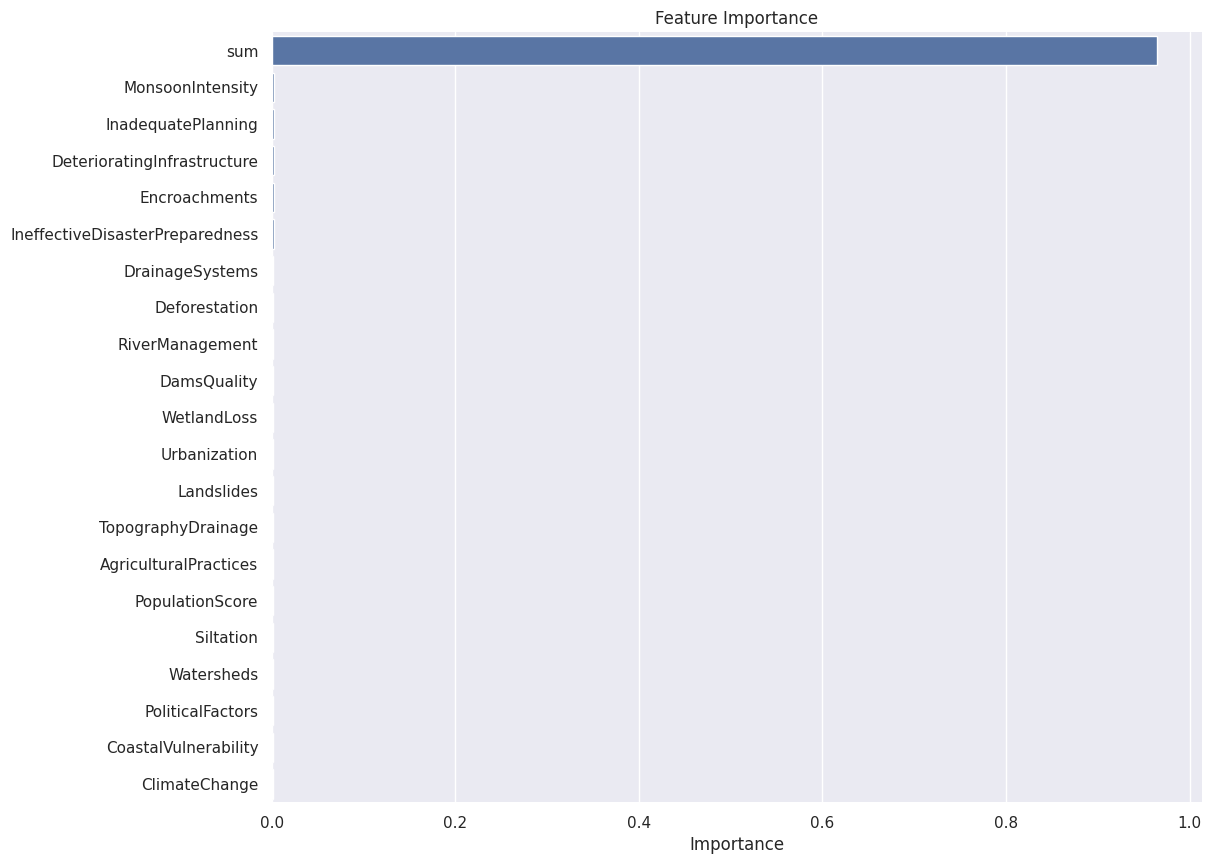

In [ ]:
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {train['FloodProbability'].shape}")

Shape of X_train: (1117957, 21)
Shape of y_train: (1117957,)


In [ ]:
y = train['FloodProbability']

In [ ]:
y

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

**PCA와 StandardScaler 적용 데이터에도 넣기**

In [ ]:
# FloodProbability 칼럼 삭제
X_train = train.iloc[:,:-1]
X_test = test
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])
# 변수 전체를 더한 Sum 칼럼 만들기
X_train['sum']= X_train.sum(axis=1)
X_test['sum'] = X_test.sum(axis=1)

In [ ]:
# Mean과 SD가 어느정도 크게 차이가 나지는 않지만 분석의 용의를 위해 표준화
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
# 데이터 확인
X_train[:10]

**PCA**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [ ]:
X = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
y = train['FloodProbability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

**LGBM**

In [ ]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
y_train_pred = lgbm_model.predict(X_train)
y_val_pred = lgbm_model.predict(X_val)
y_test_pred = lgbm_model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

In [ ]:
print("train R^2:",train_r2)
print("validation R^2:",val_r2)

**CatBoost**

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 18.1 MB/s eta 0:00:00


NameError: name 'model_prediction_regression' is not defined

In [ ]:
from sklearn.metrics import r2_score
y_train_pred = catboost_model.predict(X_train)
y_val_pred = catboost_model.predict(X_val)
y_test_pred = catboost_model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

In [ ]:
print("train R^2:",train_r2)
print("validation R^2:",val_r2)

**XGBoost**

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

In [ ]:
best_params = {'max_depth': 9, 'n_estimators': 913, 'gamma': 0.007424095823836917, 'reg_alpha': 0.2144593472679007, 'reg_lambda': 1.7404175052607878, 'min_child_weight': 0, 'subsample': 0.21959794108855646, 'colsample_bytree': 0.5971654266907475, 'learning_rate': 0.6343746303785935}
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

In [ ]:
print("train R^2:",train_r2)
print("validation R^2:",val_r2)

**Voting 활용**

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score


pca_model = VotingRegressor(
    estimators=[
        ('xgboost', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ],
    weights=[1, 1, 2]
)

r2_scores = cross_val_score(pca_model, X, y, cv=5, scoring='r2')

print("R² scores for each fold:", r2_scores)
print("Average R²:", r2_scores.mean())

In [ ]:
pca_model.fit(X, y)
y_pred_pca = pca_model.predict(X_test)

In [ ]:
df = pd.read_csv('sample_submission.csv')
df['FloodProbability'] = y_pred_pca
df
df.to_csv("ensemble_pca.csv", index=False)

## 딥러닝 기법
- TabNet
- TabFPN
- SAINT

### TabNet(R2 Score: 0.83956)

In [ ]:
!pip install pytorch_tabnet wget

from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import wget
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cach

**TabNet**

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.values
y_train = y_train.values.reshape(-1, 1)
X_val = X_val.values
y_val = y_val.values.reshape(-1, 1)
X_test = test.values

tnc = TabNetRegressor(
    optimizer_fn=torch.optim.Adam,
    mask_type='entmax'
)

tnc.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'val'],
    eval_metric=['rmse'],
    max_epochs=20,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False
)



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.02582 | train_rmse: 0.02788 | val_rmse: 0.02787 |  0:00:54s
epoch 1  | loss: 0.00109 | train_rmse: 0.02218 | val_rmse: 0.02214 |  0:01:48s
epoch 2  | loss: 0.0007  | train_rmse: 0.01984 | val_rmse: 0.01978 |  0:02:41s
epoch 3  | loss: 0.00058 | train_rmse: 0.0198  | val_rmse: 0.01974 |  0:03:33s
epoch 4  | loss: 0.00054 | train_rmse: 0.01945 | val_rmse: 0.01941 |  0:04:26s
epoch 5  | loss: 0.00052 | train_rmse: 0.02163 | val_rmse: 0.02159 |  0:05:18s
epoch 6  | loss: 0.00048 | train_rmse: 0.02012 | val_rmse: 0.02007 |  0:06:10s
epoch 7  | loss: 0.00047 | train_rmse: 0.02103 | val_rmse: 0.02091 |  0:07:02s
epoch 8  | loss: 0.00045 | train_rmse: 0.01922 | val_rmse: 0.01917 |  0:07:55s
epoch 9  | loss: 0.00043 | train_rmse: 0.02008 | val_rmse: 0.02003 |  0:08:47s
epoch 10 | loss: 0.00042 | train_rmse: 0.0195  | val_rmse: 0.01945 |  0:09:39s
epoch 11 | loss: 0.00042 | train_rmse: 0.01986 | val_rmse: 0.01982 |  0:10:31s
epoch 12 | loss: 0.00042 | train_rmse: 0.01946 | val

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
import matplotlib.pyplot as plt

# Get the history
history = tnc.history

# Extract training and validation RMSE values
train_rmse = history['train']['rmse']
val_rmse = history['val']['rmse']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('TabNet Training Progress')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred_tab = tnc.predict(X_test)
y_pred_tab

array([[1.3474207 ],
       [0.8812701 ],
       [0.87924004],
       ...,
       [1.4080404 ],
       [1.1113776 ],
       [1.0109864 ]], dtype=float32)

In [ ]:
df = pd.read_csv('sample_submission.csv')
df['FloodProbability'] = y_pred_tab
df
df.to_csv("tab_no.csv", index=False)

In [ ]:
tnc.save_model('tabnet_model')

Successfully saved model at tabnet_model.zip


'tabnet_model.zip'

In [ ]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

###TabFPN 모델(R2 Score: 0.86063)


-[TabFPN](https://arxiv.org/pdf/1612.03144)
![TabFPN](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F0ela2%2FbtqUsdFXuAe%2FzSFO8k1p1JIbMoz5vWi75k%2Fimg.png)

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

class TabFPN(nn.Module):
    def __init__(self, input_dim, num_levels, hidden_dim):
        super(TabFPN, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.levels = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim) for _ in range(num_levels)
        ])
        self.fusion = nn.Linear(hidden_dim * num_levels, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Embedding Layer
        x = self.embedding(x)

        # Feature Pyramid
        pyramid = []
        for level in self.levels:
            x = self.relu(level(x))
            pyramid.append(x)

        # Feature Fusion
        x = torch.cat(pyramid, dim=1)
        x = self.relu(self.fusion(x))

        # Output Layer
        x = self.output_layer(x)
        return x.squeeze()

# 데이터 준비
X_train = train.iloc[:, :-1]
X_test = test
y = train['FloodProbability']
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

# 표준화
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA 적용
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Tensor로 변환
X_train_tensor_pca = torch.tensor(X_train_pca, dtype=torch.float32)
X_test_tensor_pca = torch.tensor(X_test_pca, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Train 데이터 분할
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(X_train_tensor_pca, y_tensor, test_size=0.3, random_state=42)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 모델 초기화 및 하이퍼파라미터 설정
input_dim = X_train_pca.shape[1]
num_levels = 3
hidden_dim = 128
model = TabFPN(input_dim, num_levels, hidden_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 함수 정의
def train_model(model, optimizer, train_loader, val_loader, criterion, epochs=10):
    history = {
        'train_loss': [],
        'val_loss': []
    }
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_loader.dataset)
        history['val_loss'].append(val_loss)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return history

# 모델 학습
history = train_model(model, optimizer, train_loader, val_loader, criterion)

# 예측
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor_pca).numpy()

# 결과 저장
submission_df = pd.read_csv('sample_submission.csv')
submission_df['FloodProbability'] = predictions
submission_df.to_csv("tabfpn.csv", index=False)

# 학습 기록 시각화
epochs = range(1, len(history['train_loss']) + 1)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history['train_loss'], 'b', label='Train Loss')
plt.plot(epochs, history['val_loss'], 'r', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/10, Train Loss: 0.0005, Val Loss: 0.0005
Epoch 2/10, Train Loss: 0.0004, Val Loss: 0.0004
Epoch 3/10, Train Loss: 0.0004, Val Loss: 0.0004
Epoch 4/10, Train Loss: 0.0004, Val Loss: 0.0004
Epoch 5/10, Train Loss: 0.0004, Val Loss: 0.0004
Epoch 6/10, Train Loss: 0.0004, Val Loss: 0.0004
Epoch 7/10, Train Loss: 0.0004, Val Loss: 0.0004
Epoch 8/10, Train Loss: 0.0004, Val Loss: 0.0004
Epoch 9/10, Train Loss: 0.0004, Val Loss: 0.0004
Epoch 10/10, Train Loss: 0.0004, Val Loss: 0.0004


In [12]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [14]:
# 시각화
from torchviz import make_dot
dummy_input = torch.randn(1, input_dim)
yhat = model(dummy_input)

# 모델 시각화
make_dot(yhat, params=dict(model.named_parameters())).render("tabfpn_model", format="png")

'tabfpn_model.png'

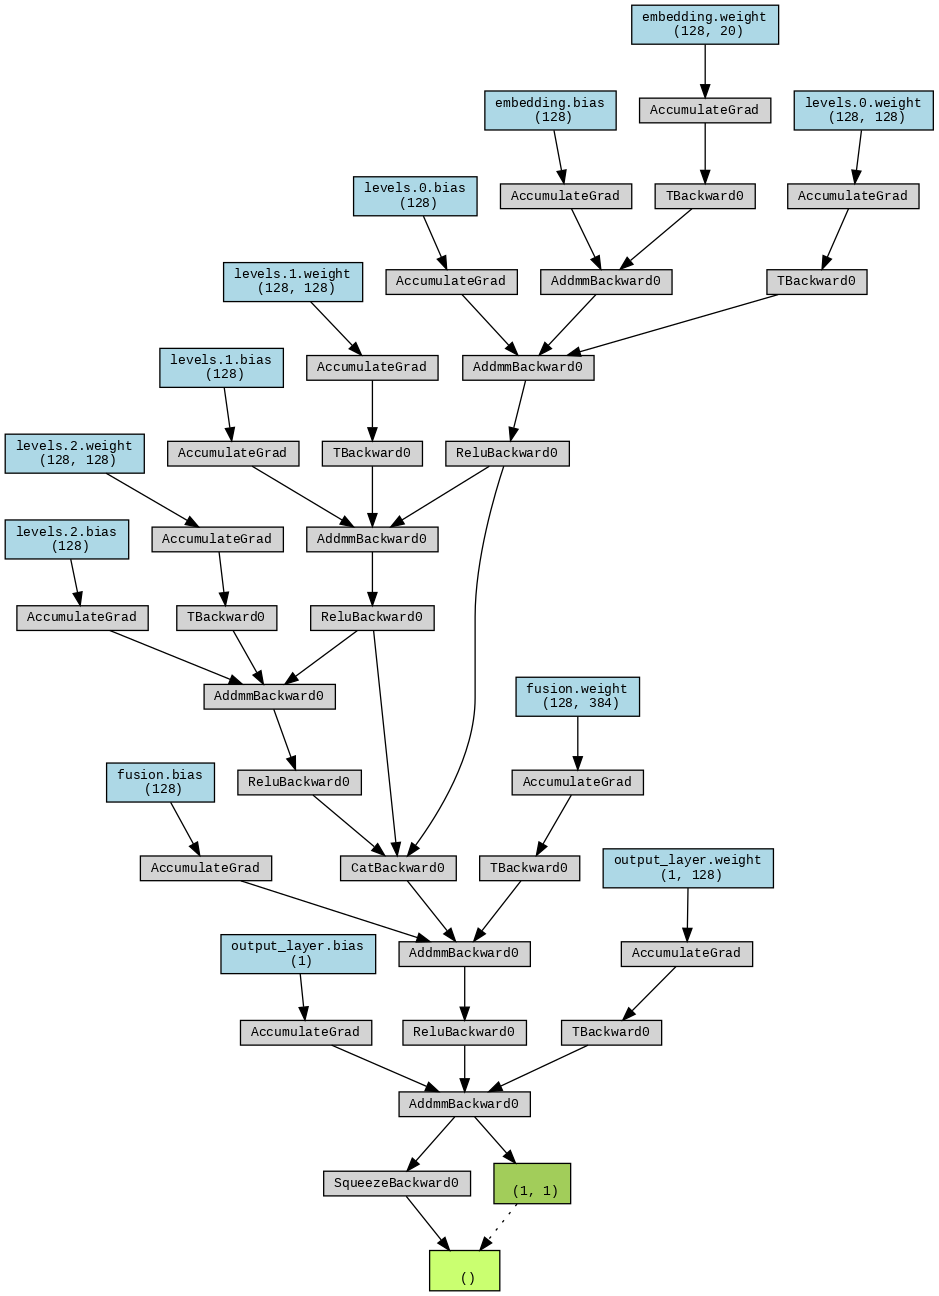

In [15]:
from IPython.display import Image
Image(filename='/content/tabfpn_model.png')

### SAINT 모델


-[SAINT 모델 설명](https://arxiv.org/pdf/2106.01342)

-![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkFTk1%2FbtrIT81KZO8%2FNcVEZ9wsfp6iTK0SHhAMt0%2Fimg.png)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import r2_score

# SAINT 모델 정의
class SAINT(nn.Module):
    def __init__(self, input_dim, n_heads, n_layers, hidden_dim):
        super(SAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.pos_embedding = nn.Parameter(torch.randn(1, 1, hidden_dim))
        self.transformer = nn.Transformer(
            d_model=hidden_dim,
            nhead=n_heads,
            num_encoder_layers=n_layers,
            num_decoder_layers=n_layers,
            dim_feedforward=hidden_dim,
            dropout=0.1
        )
        self.fc = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.embedding(x) + self.pos_embedding
        x = self.relu(x)
        x = x.permute(1, 0, 2)
        x = self.transformer(x, x)
        x = x.permute(1, 0, 2)
        x = self.fc(x[:, -1])
        return x.squeeze()

# 데이터 준비
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.drop(columns=['id', 'FloodProbability'])
y = train['FloodProbability']
X_test = test.drop(columns=['id'])

# 변수 전체를 더한 Sum 칼럼 만들기
X_train['sum'] = X_train.sum(axis=1)
X_test['sum'] = X_test.sum(axis=1)

# 표준화
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA 적용
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Tensor로 변환
X_train_tensor_pca = torch.tensor(X_train_pca, dtype=torch.float32)
X_test_tensor_pca = torch.tensor(X_test_pca, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Train 데이터 분할
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(X_train_tensor_pca, y_tensor, test_size=0.3, random_state=42)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 모델 초기화 및 하이퍼파라미터 설정
input_dim = X_train_pca.shape[1]
n_heads = 4
n_layers = 2
hidden_dim = 128
model = SAINT(input_dim, n_heads, n_layers, hidden_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 함수 정의
def train_model(model, optimizer, train_loader, val_loader, criterion, epochs=10):
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_r2': []
    }
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()

            X_batch = X_batch.unsqueeze(0).permute(1, 0, 2)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(1)

        train_loss /= len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        val_predictions = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.unsqueeze(0).permute(1, 0, 2)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(1)
                val_predictions.extend(outputs.numpy())

        val_loss /= len(val_loader.dataset)
        history['val_loss'].append(val_loss)

        val_r2 = r2_score(y_val_tensor.numpy(), val_predictions)
        history['val_r2'].append(val_r2)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val R²: {val_r2:.4f}')

    return history

# 모델 학습
history = train_model(model, optimizer, train_loader, val_loader, criterion)

# 검증 데이터에 대한 R² 점수 계산
model.eval()
with torch.no_grad():
    X_val_tensor_expanded = X_val_tensor.unsqueeze(0).permute(1, 0, 2)
    val_predictions = model(X_val_tensor_expanded).numpy()
    r2_val = r2_score(y_val_tensor.numpy(), val_predictions)
    print(f'R² score on validation set: {r2_val:.4f}')

# 학습 데이터에 대한 R² 점수 계산
with torch.no_grad():
    X_train_tensor_expanded = X_train_tensor.unsqueeze(0).permute(1, 0, 2)
    train_predictions = model(X_train_tensor_expanded).numpy()
    r2_train = r2_score(y_train_tensor.numpy(), train_predictions)
    print(f'R² score on training set: {r2_train:.4f}')

# 예측
model.eval()
with torch.no_grad():
    X_test_tensor_expanded = X_test_tensor_pca.unsqueeze(0).permute(1, 0, 2)
    predictions = model(X_test_tensor_expanded).numpy()

# 결과 저장
submission_df = pd.read_csv('sample_submission.csv')
submission_df['FloodProbability'] = predictions
submission_df.to_csv("saint.csv", index=False)

# 학습 기록 출력
import matplotlib.pyplot as plt

epochs = range(1, len(history['train_loss']) + 1)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history['train_loss'], 'b', label='Train Loss')
plt.plot(epochs, history['val_loss'], 'r', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history['val_r2'], 'g', label='Validation R²')
plt.title('Validation R²')
plt.xlabel('Epochs')
plt.ylabel('R²')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/20, Train Loss: 0.0000, Val Loss: 0.0000, Val R²: 0.8406
Epoch 2/20, Train Loss: 0.0000, Val Loss: 0.0000, Val R²: 0.8580
Epoch 3/20, Train Loss: 0.0000, Val Loss: 0.0000, Val R²: 0.8390


KeyboardInterrupt: 

In [ ]:
from torchviz import make_dot

model = SAINT(input_dim, n_heads, n_layers, hidden_dim)

example_input = torch.randn(1, input_dim)
output = model(example_input)

# 모델 시각화
make_dot(yhat, params=dict(model.named_parameters())).render("saint_model", format="png")


In [ ]:
from IPython.display import Image
Image(filename='/content/saint_model.png')